In [338]:
try:
    # if this notebook is being called by another one
    # used passed gene_name value
    gene_name
    enriched_test
except:
    # otherwise, set value to amacGFP / avGFP / cgreGFP / ppluGFP,
    # for instance for debugging here
    gene_name="avGFP"
    enriched_test=False

working_folder = 'top5_covariance'


In [339]:
if not gene_name.endswith("GFP"):
    gene_name = gene_name+"GFP"

In [340]:
# if load_encodings (boolean)
# exists and is False, encodings won't be loaded
# if not defined or not False, load encodings
try:
    load_encodings
    if load_encodings != False:
        load_encodings = True
except:
    load_encodings = True

Import modules
Define functions
Load avGFP data
avGFP 239 aa


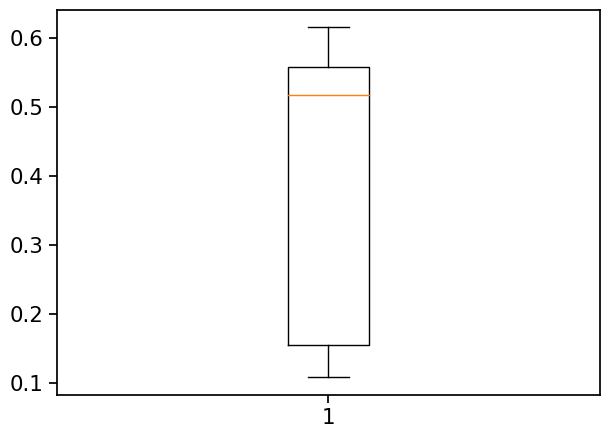

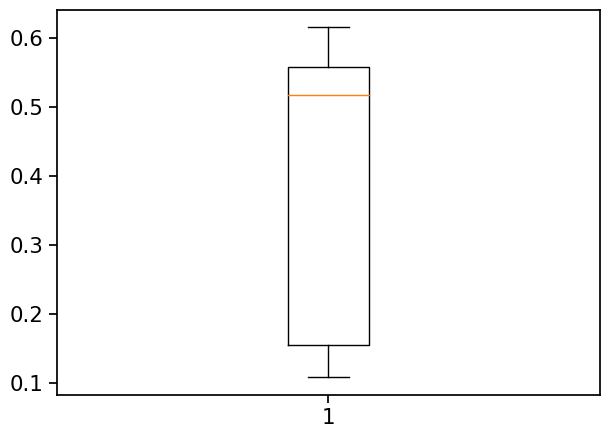

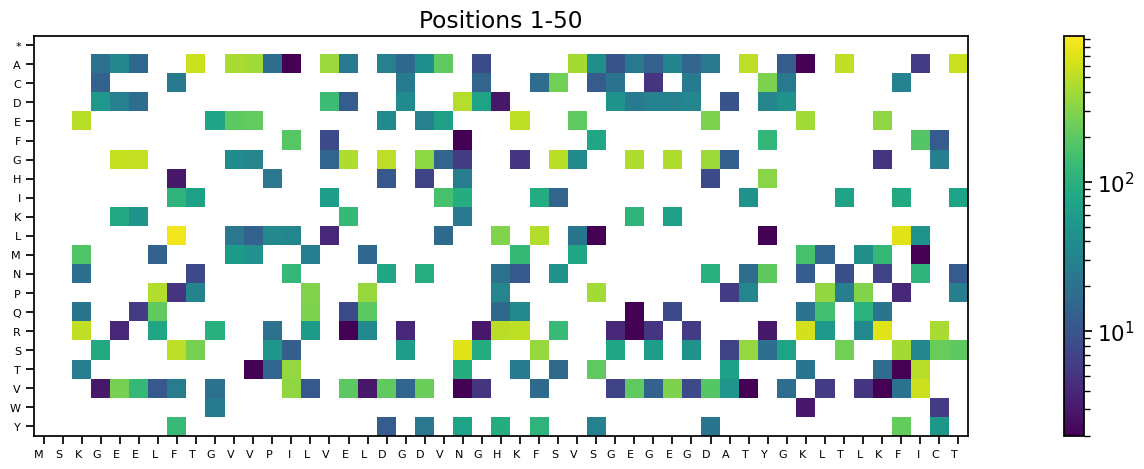

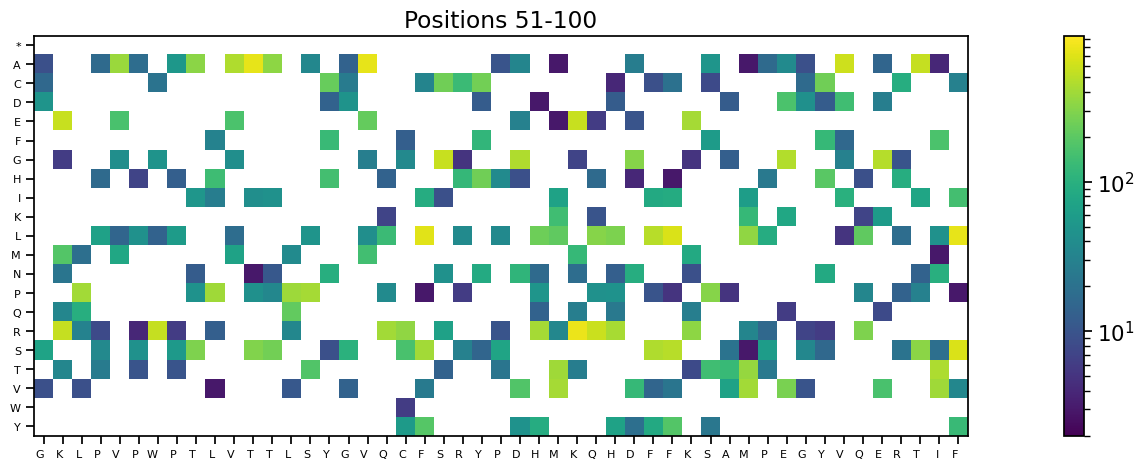

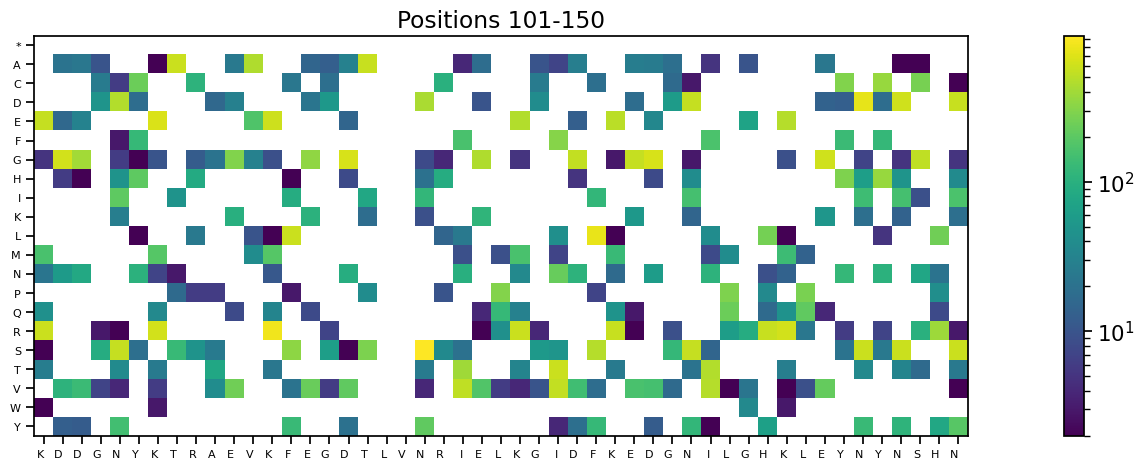

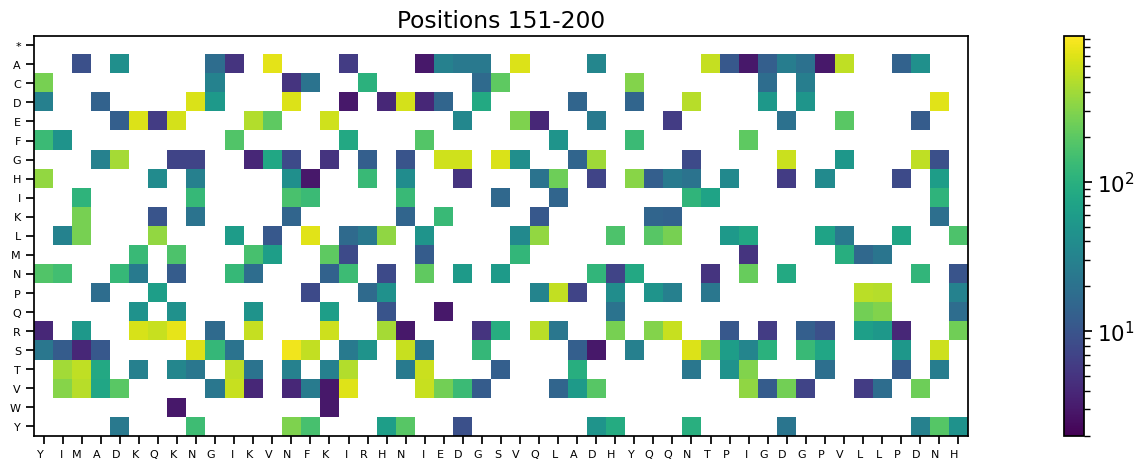

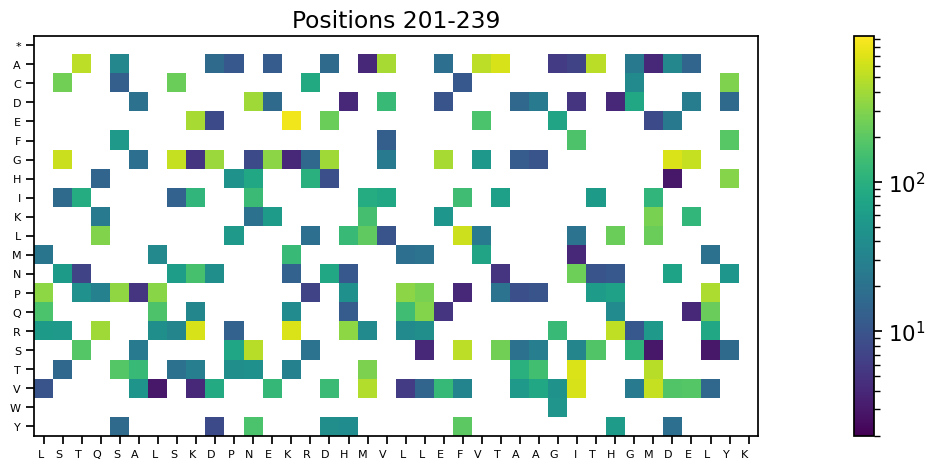

In [341]:
%run 01_Load_data.ipynb


In [342]:
# function to reverse oneHot encoding, making sure everything is OK
def one_hot_to_seq(df):

    seqs = []
    cols = df.columns
    for index, row in df.iterrows():
        seq = str()
        for i in range(len(row)):
            if row[i] == 1:
                seq = seq+cols[i][-1]

        seqs.append(seq)

    seqs = pd.DataFrame(seqs, columns=["rebuilt_seq"])
    return(seqs)


PREPROCESING

In [343]:
brightness_col = 'medianBrightness'

In [344]:
df["full_seq"] = get_seq_from_genotype.fit_transform(df)
df['full_seq'] = df['full_seq'].str[:-1]
df.loc[0,'full_seq']

'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [345]:
wt_seq = df.loc[0,'full_seq']

In [346]:
seqs = df['full_seq']

In [347]:
def mutations_encoding(seq, wt_seq):
    encoded=''
    for i, aa in enumerate(seq):
        if seq[i] == wt_seq[i]:
            encoded+='0'
            # print('wt')
            pass
        else:
            # print(i)
            encoded+='1'
            # print('mutant')
    return encoded

## Covariance analysis 

In [348]:
df_sorted = df.sort_values(brightness_col, ascending=False)
df_sorted

aaMutations  medianBrightness  \
43310                          T37S:K40R:N104S          4.123109   
22533                        K106R:V162G:N211S          4.114503   
23916                                    K157G          4.113576   
53369                          Y38N:T61A:Q156R          4.113576   
48709                              V162A:S174R          4.107867   
...                                        ...               ...   
10776                F26S:E33G:H76R:F82Y:D179G          1.289624   
7350                E33V:L43P:K78E:I187L:T224S          1.289350   
25703  K25E:E89G:T107A:I122T:L140R:M152V:Y236C          1.286571   
26105                           K25M:L63P:F98L          1.285992   
10393                         F26I:Q182R:K213R          1.283419   

                            aa_genotype_pseudo  \
43310                          T40S:K43R:N108S   
22533                        K110R:V166G:N218S   
23916                                    K161G   
53369                          Y41N:T64A:Q160R   
48709                              V166A:S178R   
...                                        ...   
10776                F29S:E36G:H79R:F85Y:D183G   
7350                E36V:L46P:K81E:I191L:T232S   
25703  K28E:E93G:T111A:I126T:L144R:M156V:Y244C   
26105                          K28M:L66P:F102L   
10393                         F29I:Q186R:K221R   

                                                full_seq  
43310  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
22533  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23916  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
53369  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
48709  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                  ...  
10776  MSKGEELFTGVVPILVELDGDVNGHKSSVSGEGGGDATYGKLTLKF...  
7350   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTPKF...  
25703  MSKGEELFTGVVPILVELDGDVNGHEFSVSGEGEGDATYGKLTLKF...  
26105  MSKGEELFTGVVPILVELDGDVNGHMFSVSGEGEGDATYGKLTLKF...  
10393  MSKGEELFTGVVPILVELDGDVNGHKISVSGEGEGDATYGKLTLKF...  

[51715 rows x 4 columns]

In [375]:
# Calculate the number of rows to select (5% of the total rows)
num_rows_to_select = int(len(df_sorted) * 0.05)
# num_rows_to_select=10

subset_df = df_sorted.iloc[:num_rows_to_select]
subset_df = subset_df.reset_index(drop=True)
subset_df

aaMutations  medianBrightness aa_genotype_pseudo  \
0       T37S:K40R:N104S          4.123109    T40S:K43R:N108S   
1     K106R:V162G:N211S          4.114503  K110R:V166G:N218S   
2                 K157G          4.113576              K161G   
3       Y38N:T61A:Q156R          4.113576    Y41N:T64A:Q160R   
4           V162A:S174R          4.107867        V166A:S178R   
...                 ...               ...                ...   
2580        V175A:K208R          3.766202        V179A:K215R   
2581          T8S:I228T          3.766199         T11S:I236T   
2582         M77V:K161M          3.766165         M80V:K165M   
2583          L6Q:D154G          3.766140          L9Q:D158G   
2584         T49S:Y181C          3.766126         T52S:Y185C   

                                               full_seq  
0     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
1     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
4     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                 ...  
2580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2581  MSKGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2582  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2583  MSKGEEQFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2584  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[2585 rows x 4 columns]

Text(0, 0.5, 'brightness')

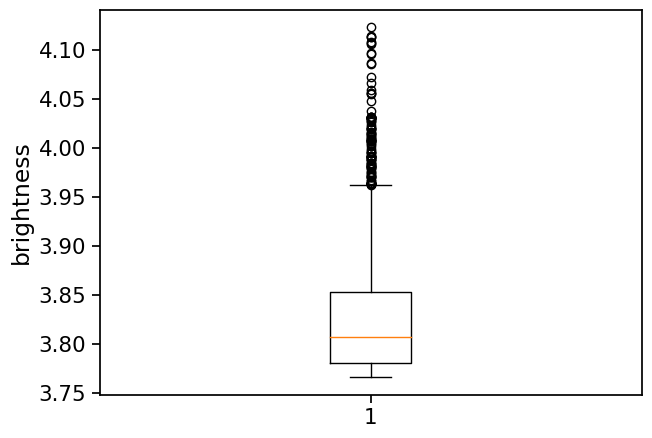

In [350]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

plt.boxplot(subset_df[brightness_col])
plt.ylabel("brightness")
    

In [351]:
subset_df

aaMutations  medianBrightness aa_genotype_pseudo  \
0       T37S:K40R:N104S          4.123109    T40S:K43R:N108S   
1     K106R:V162G:N211S          4.114503  K110R:V166G:N218S   
2                 K157G          4.113576              K161G   
3       Y38N:T61A:Q156R          4.113576    Y41N:T64A:Q160R   
4           V162A:S174R          4.107867        V166A:S178R   
...                 ...               ...                ...   
2580        V175A:K208R          3.766202        V179A:K215R   
2581          T8S:I228T          3.766199         T11S:I236T   
2582         M77V:K161M          3.766165         M80V:K165M   
2583          L6Q:D154G          3.766140          L9Q:D158G   
2584         T49S:Y181C          3.766126         T52S:Y185C   

                                               full_seq  
0     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...  
1     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...  
4     MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                 ...  
2580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2581  MSKGEELFSGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2582  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2583  MSKGEEQFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2584  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[2585 rows x 4 columns]

In [352]:
#mutation encode subset df
for i, row in subset_df.iterrows():
    s = mutations_encoding(row['full_seq'], wt_seq)
    subset_df.loc[i,'mutation_enc'] = s
    subset_df.loc[i,'n_mutaions'] =  sum(int(char) for char in s)

In [353]:
subset_df['mutation_enc']

df_mutations = subset_df['mutation_enc'].apply(lambda x: pd.Series(list(x))).astype(int)

# Optionally, rename columns to reflect positions if necessary
df_mutations.columns = [f'Position_{i}{wt_seq[i]}' for i in df_mutations.columns]

In [354]:
df_mutations

Position_0M  Position_1S  Position_2K  Position_3G  Position_4E  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
2580            0            0            0            0            0   
2581            0            0            0            0            0   
2582            0            0            0            0            0   
2583            0            0            0            0            0   
2584            0            0            0            0            0   

      Position_5E  Position_6L  Position_7F  Position_8T  Position_9G  ...  \
0               0            0            0            0            0  ...   
1               0            0            0            0            0  ...   
2               0            0            0            0            0  ...   
3               0            0            0            0            0  ...   
4               0            0            0            0            0  ...   
...           ...          ...          ...          ...          ...  ...   
2580            0            0            0            0            0  ...   
2581            0            0            0            1            0  ...   
2582            0            0            0            0            0  ...   
2583            0            1            0            0            0  ...   
2584            0            0            0            0            0  ...   

      Position_228I  Position_229T  Position_230H  Position_231G  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2580              0              0              0              0   
2581              1              0              0              0   
2582              0              0              0              0   
2583              0              0              0              0   
2584              0              0              0              0   

      Position_232M  Position_233D  Position_234E  Position_235L  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2580              0              0              0              0   
2581              0              0              0              0   
2582              0              0              0              0   
2583              0              0              0              0   
2584              0              0              0              0   

      Position_236Y  Position_237K  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
...             ...            ...  
2580              0              0  
2581              0              0  
2582              0              0  
2583              0              0  
2584              0              0  

[2585 rows x 238 columns]

In [355]:
covariance_matrix=df_mutations.cov()
covariance_matrix


Position_0M  Position_1S  Position_2K  Position_3G  \
Position_0M            0.0          0.0     0.000000     0.000000   
Position_1S            0.0          0.0     0.000000     0.000000   
Position_2K            0.0          0.0     0.023787     0.000330   
Position_3G            0.0          0.0     0.000330     0.002317   
Position_4E            0.0          0.0    -0.000622    -0.000059   
...                    ...          ...          ...          ...   
Position_233D          0.0          0.0    -0.000415    -0.000040   
Position_234E          0.0          0.0    -0.000151    -0.000051   
Position_235L          0.0          0.0    -0.000198     0.000331   
Position_236Y          0.0          0.0    -0.000528    -0.000050   
Position_237K          0.0          0.0     0.000000     0.000000   

               Position_4E  Position_5E  Position_6L  Position_7F  \
Position_0M       0.000000     0.000000     0.000000     0.000000   
Position_1S       0.000000     0.000000     0.000000     0.000000   
Position_2K      -0.000622    -0.000453     0.000585    -0.000217   
Position_3G      -0.000059    -0.000043    -0.000018    -0.000021   
Position_4E       0.024890     0.000300     0.000189     0.000160   
...                    ...          ...          ...          ...   
Position_233D    -0.000048    -0.000316     0.000255    -0.000152   
Position_234E    -0.000563    -0.000410    -0.000171    -0.000196   
Position_235L    -0.000226    -0.000446    -0.000186    -0.000213   
Position_236Y     0.000608     0.000372    -0.000168    -0.000193   
Position_237K     0.000000     0.000000     0.000000     0.000000   

               Position_8T  Position_9G  ...  Position_228I  Position_229T  \
Position_0M       0.000000     0.000000  ...       0.000000       0.000000   
Position_1S       0.000000     0.000000  ...       0.000000       0.000000   
Position_2K      -0.000094    -0.000066  ...       0.000388      -0.000188   
Position_3G      -0.000046    -0.000006  ...      -0.000074      -0.000055   
Position_4E      -0.000117    -0.000069  ...      -0.000810      -0.000216   
...                    ...          ...  ...            ...            ...   
Position_233D     0.000825    -0.000046  ...      -0.000153      -0.000015   
Position_234E    -0.000048    -0.000060  ...       0.000074      -0.000521   
Position_235L     0.000301    -0.000065  ...       0.000400      -0.000179   
Position_236Y    -0.000428    -0.000059  ...      -0.000300      -0.000124   
Position_237K     0.000000     0.000000  ...       0.000000       0.000000   

               Position_230H  Position_231G  Position_232M  Position_233D  \
Position_0M         0.000000       0.000000       0.000000       0.000000   
Position_1S         0.000000       0.000000       0.000000       0.000000   
Position_2K         0.000378      -0.000198      -0.001104      -0.000415   
Position_3G        -0.000038      -0.000019      -0.000105      -0.000040   
Position_4E        -0.000028      -0.000207      -0.001156      -0.000048   
...                      ...            ...            ...            ...   
Position_233D      -0.000277      -0.000138       0.000003       0.016738   
Position_234E       0.000029       0.000208      -0.000611       0.000012   
Position_235L      -0.000390       0.000192      -0.000699      -0.000021   
Position_236Y       0.000422      -0.000176      -0.000981       0.000405   
Position_237K       0.000000       0.000000       0.000000       0.000000   

               Position_234E  Position_235L  Position_236Y  Position_237K  
Position_0M         0.000000       0.000000       0.000000            0.0  
Position_1S         0.000000       0.000000       0.000000            0.0  
Position_2K        -0.000151      -0.000198      -0.000528            0.0  
Position_3G        -0.000051       0.000331      -0.000050            0.0  
Position_4E        -0.000563      -0.000226       0.000608            0.0  
...                      ...           

In [356]:

# Step 1: Mask the diagonal elements to avoid self-covariance
np.fill_diagonal(covariance_matrix.values, np.nan)

# Step 2: Find the top 20 highest absolute values in the covariance matrix
# Unstack the matrix to a long format where each row is a pair of variables
unstacked_cov = covariance_matrix.unstack()

# Drop NaN values (which are the diagonal elements we set to NaN)
filtered_cov = unstacked_cov.dropna()

# Sort by absolute values but keep the original sign of values
sorted_cov = filtered_cov.abs().sort_values(ascending=False)
# Convert index to frozenset (which is hashable and can be used in a pandas index)
sorted_cov.index = sorted_cov.index.map(frozenset)
# Now, drop duplicates
sorted_cov = sorted_cov[~sorted_cov.index.duplicated()]
sorted_cov.index = sorted_cov.index.map(lambda x: sorted(list(x)))


In [357]:
import pandas as pd
import itertools

# Assume df is your DataFrame

# Generating all column pairs without repetitions
column_pairs = list(itertools.combinations(df_mutations.columns, 2))

# Dictionary to store the counts of co-occurrences of 1s
co_occurrences = {}

# Counting co-occurrences of 1s for each pair
for col1, col2 in column_pairs:
    # We use the logical AND operation & to find rows where both columns are 1
    count = df_mutations[(df_mutations[col1] == 1) & (df_mutations[col2] == 1)].shape[0]
    co_occurrences[(col1, col2)] = count

# Optionally, convert the dictionary to a DataFrame for better visualization and manipulation
co_occurrences_df = pd.DataFrame(list(co_occurrences.items()), columns=['Column_Pair', 'Count_1s'])

# Show some of the results
print(co_occurrences_df.head())


                  Column_Pair  Count_1s
0  (Position_0M, Position_1S)         0
1  (Position_0M, Position_2K)         0
2  (Position_0M, Position_3G)         0
3  (Position_0M, Position_4E)         0
4  (Position_0M, Position_5E)         0


In [358]:
co_occurrences_df = co_occurrences_df.sort_values(ascending=False,by='Count_1s')
co_occurrences_df.head(20)

Column_Pair  Count_1s
18531   (Position_98F, Position_157K)        11
25951  (Position_170I, Position_197N)        10
24975  (Position_157K, Position_170I)        10
25002  (Position_157K, Position_197N)         9
27398  (Position_197N, Position_213K)         9
25967  (Position_170I, Position_213K)         8
24801  (Position_155K, Position_157K)         8
19602  (Position_106K, Position_152M)         8
19419  (Position_104N, Position_232M)         8
12675   (Position_61T, Position_110E)         8
22140  (Position_127I, Position_170I)         8
25403  (Position_162V, Position_213K)         8
25037  (Position_157K, Position_232M)         8
23941  (Position_145N, Position_162V)         8
26953  (Position_187I, Position_213K)         8
12722   (Position_61T, Position_157K)         7
24557  (Position_152M, Position_162V)         7
22132  (Position_127I, Position_162V)         7
25976  (Position_170I, Position_222F)         7
24857  (Position_155K, Position_213K)         7

In [359]:
def pair_stats(pos0, pos1, df_mutations):
    pos0_mutations =sum(df_mutations[pos0])
    pos1_mutations =sum(df_mutations[pos1])
    print(f'{pos0} was mutated {pos0_mutations} times')
    print(f'{pos1} was mutated {pos1_mutations} times')


In [360]:
# Show the pairs of positions that have the highest covariance from the matrix
for pos, covariance in sorted_cov.items():
    print(f"Positions: {pos[0], pos[1]}, Covariance: {covariance}")
    print(f'{pos[0]} was mutated {sum(df_mutations[pos[0]])} times')
    print(f'{pos[1]} was mutated {sum(df_mutations[pos[1]])} times')


Positions: ('Position_110E', 'Position_61T'), Covariance: 0.0023603068428837606
Position_110E was mutated 39 times
Position_61T was mutated 126 times
Positions: ('Position_157K', 'Position_163N'), Covariance: 0.0022905426040924484
Position_157K was mutated 170 times
Position_163N was mutated 90 times
Positions: ('Position_157K', 'Position_98F'), Covariance: 0.002271829020725671
Position_157K was mutated 170 times
Position_98F was mutated 78 times
Positions: ('Position_106K', 'Position_152M'), Covariance: 0.002212694097286685
Position_106K was mutated 59 times
Position_152M was mutated 100 times
Positions: ('Position_187I', 'Position_213K'), Covariance: 0.002208352545945588
Position_187I was mutated 49 times
Position_213K was mutated 121 times
Positions: ('Position_157K', 'Position_162V'), Covariance: 0.0021984717739279435
Position_157K was mutated 170 times
Position_162V was mutated 132 times
Positions: ('Position_152M', 'Position_157K'), Covariance: 0.0021580504338557234
Position_152M

In [366]:

import plotly.graph_objects as go
import numpy as np

colorscale = [[0.0, u'#ffffff'],
            [0.25, u'#179bff'],
            [0.5, u'#adff23'],
            [1, u'#ff4c0a']]

# plot frequency of all mutations in the library

# set the minimum number of occurences 
# (mutations with less occurences than this threshold will not be represented)
seen_at_least = 0

codes = sorted(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
            'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', "*"])

all_muts = sorted(list(flatten([ elt.split(":") for elt in subset_df[genotype_col].values.flatten() if str(elt)!="wt"])))

all_muts_as_dict={}
for i in range(len(wt_seq)):
    c=wt_seq[i]
    all_muts_as_dict[i] = {k:0 for k in codes}

for mut in all_muts:
    all_muts_as_dict[int(mut[1:-1])][mut[-1]]+=1 # fixed when introduced Louisa's numbering (M=0)


all_muts_as_table = [[int(all_muts_as_dict[k][v2]) for v2 in sorted(all_muts_as_dict[k].keys())] for k in sorted(all_muts_as_dict.keys())]


# xs = [c for c in wt_seq]
xs = [c+str(i) for i, c in enumerate(wt_seq)]
ys = codes

mut_freq = pd.DataFrame(np.array(all_muts_as_table).transpose(),
                    index=ys,
                    columns=xs)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for cols in [elt for elt in chunks(range(len(mut_freq.columns)),50)]:

    data = mut_freq.iloc[:,cols[0]:cols[-1]]
        # Calculate the sum of each column and append it as a new row
    column_sums = data.sum(axis=0).to_frame().transpose()
    column_sums.index = ["N times mutated"]
    data = pd.concat([ column_sums, data], axis=0)

    fig = go.Figure(data=go.Heatmap(
        z=data,
        x=data.columns,  # X-axis labels from sliced DataFrame
        y=data.index,  # Y-axis labels, assuming rows are significant and labelled (e.g., by 'codes')
        colorscale=colorscale,
        colorbar=dict(title='Frequency'),
        zmin=seen_at_least,  # Minimum color scale value
        zmax=mut_freq.max().max(),  # Maximum color scale value
        hoverongaps=False,
        xgap = 1,
        ygap = 1,
    ))

    fig.update_layout(
        title=f"Positions {cols[0]+1}-{cols[-1]+1}",
        xaxis=dict(tickmode='array', tickvals=np.arange(len(data.columns)), ticktext=data.columns),
        yaxis=dict(tickmode='array', tickvals=np.arange(len(data.index)), ticktext=data.index),
        xaxis_tickangle=-90
        
    )
    # fig.update_xaxes(tickson='boundaries')
    fig.show()
    fig.write_html(f"{working_folder}\Positions{str(cols[0]+1)}.html")

In [367]:
mut_freq

M0  S1  K2  G3  E4  E5  L6  F7  T8  G9  ...  I228  T229  H230  G231  M232  \
*   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
A   0   0   0   1   2   0   0   0  32   0  ...     0    39     0     3     0   
C   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     3     0   
D   0   0   0   1   3   1   0   0   0   0  ...     0     0     1    12     0   
E   0   0  18   0   0   0   0   0   0   3  ...     0     0     0     0     1   
F   0   0   0   0   0   0   0   0   0   0  ...    21     0     0     0     0   
G   0   0   0   0  32  32   0   0   0   0  ...     0     0     0     0     0   
H   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
I   0   0   0   0   0   0   0   2   3   0  ...     0     3     0     0     5   
K   0   0   0   0  10   5   0   0   0   0  ...     0     0     0     0    13   
L   0   0   0   0   0   0   0  20   0   0  ...     0     0     7     0    12   
M   0   0   4   0   0   0   1   0   0   0  ...     2     0     0     0     0   
N   0   0   3   0   0   0   0   0   2   0  ...     6     1     0     0     0   
P   0   0   0   0   0   0   9   0   0   0  ...     0     7     6     0     0   
Q   0   0   0   0   0   2   7   0   0   0  ...     0     0     1     0     0   
R   0   0  37   0   0   1   3   0   0   4  ...     0     0    23     0     7   
S   0   0   0   4   0   0   0   1  14   0  ...     0    11     0     2     0   
T   0   0   1   0   0   0   0   0   0   0  ...    27     0     0     0    31   
V   0   0   0   0  19   7   0   0   0   0  ...    26     0     0     1    48   
W   0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
Y   0   0   0   0   0   0   0   0   0   0  ...     0     0     4     0     0   

   D233  E234  L235  Y236  K237  
*     0     0     0     0     0  
A     0     1     0     0     0  
C     0     0     0    16     0  
D     0     4     0     1     0  
E     1     0     0     0     0  
F     0     0     0     9     0  
G    35    32     0     0     0  
H     0     0     0    25     0  
I     0     0     0     0     0  
K     0     7     0     0     0  
L     0     0     0     0     0  
M     0     0     0     0     0  
N     3     0     0     4     0  
P     0     0    40     0     0  
Q     0     0    14     0     0  
R     0     0     6     0     0  
S     0     0     0     1     0  
T     0     0     0     0     0  
V     4    13     2     0     0  
W     0     0     0     0     0  
Y     1     0     0     0     0  

[21 rows x 238 columns]

## Generate variants from selected positions and predict brightness  

In [368]:
##Select positions
selected = ['E110',
            'T61',
            'K157',
            'N163',
            'F98']


mut_freq[selected]
dc_mutations = {}
for i, col in mut_freq[selected].iteritems():
    dc_mutations[i]=[]
    for j in range(len(col)):
        if col[j]>0:
            dc_mutations[i].append(i+col.index[j])
dc_mutations 

{'E110': ['E110A', 'E110D', 'E110G', 'E110K', 'E110Q', 'E110V'],
 'T61': ['T61A', 'T61P', 'T61S'],
 'K157': ['K157E', 'K157G', 'K157M', 'K157Q', 'K157R', 'K157T', 'K157V'],
 'N163': ['N163C', 'N163D', 'N163H', 'N163I', 'N163S', 'N163T', 'N163Y'],
 'F98': ['F98C', 'F98I', 'F98L', 'F98S', 'F98V', 'F98Y']}

Total of 12543 posible combinations

In [ ]:
## Generate all posible combinations 
from itertools import combinations, product
#list all posible combinations
# Convert the dictionary values to a list of lists for easier processing
values_list = list(dc_mutations.values())

# Calculate all possible combinations of the lists (from 1 to all lists)
all_combinations = []
for r in range(1, len(values_list) + 1):
    for group in combinations(values_list, r):
        # For each combination of lists, calculate the cartesian product
        for product_combination in product(*group):
            product_str = ":".join(product_combination)
            all_combinations.append(product_str)

# Show the first 20 combinations as an example
all_combinations[100:110], len(all_combinations)

In [376]:
## get the variants selected that were already in the dataset 
df_selected = df[df['aaMutations'].isin(all_combinations)].sort_values(brightness_col)

Text(0, 0.5, 'brightness')

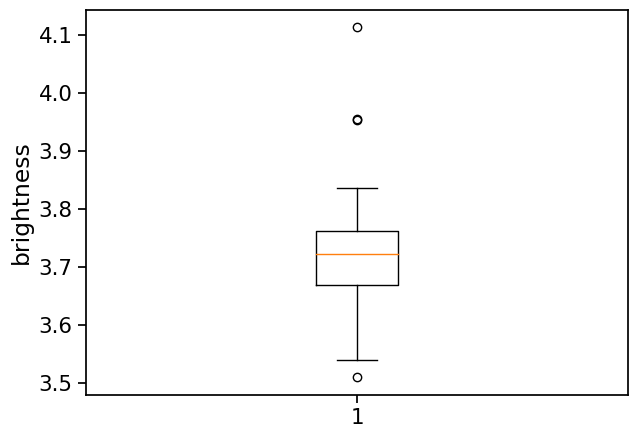

In [378]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

plt.boxplot(df_selected[brightness_col])
plt.ylabel("brightness")
    

In [ ]:
sequences = df_selected['full_seq'].to_list()

# # def create_information_matrix(sequences, background_freq=None):
    # Create a DataFrame to hold counts
df_matrix = pd.DataFrame([list(seq) for seq in sequences])
df_matrix = df_matrix.loc[:, df_matrix.nunique() > 1]

num_symbols=20
# Calculate frequency of each base/amino acid at each position
freq_df = df_matrix.apply(lambda x: x.value_counts(normalize=True), axis=0).fillna(0).transpose()
x_labels = freq_df.index.to_list()
freq_df.reset_index(inplace=True, drop=True)
freq_df.index.name='pos'

print(freq_df)



In [386]:
df_selected

aaMutations  medianBrightness aa_genotype_pseudo  \
4663   E110D:N163D          3.510127        E114D:N167D   
4669         E110G          3.539372              E114G   
4657   E110A:N163D          3.565188        E114A:N167D   
4653         E110A          3.633695              E114A   
14863         F98I          3.638574              F102I   
15353         F98V          3.656250              F102V   
36586        N163S          3.661418              N167S   
36574        N163I          3.662551              N167I   
36569        N163H          3.662933              N167H   
23938        K157Q          3.675762              K161Q   
23932  K157M:N163S          3.677240        K161M:N167S   
23893  K157E:N163D          3.678568        K161E:N167D   
23999  K157R:N163D          3.681571        K161R:N167D   
4736         E110K          3.689720              E114K   
14908         F98L          3.693903              F102L   
15361         F98Y          3.696445              F102Y   
36643        N163Y          3.718171              N167Y   
36518        N163D          3.723264              N167D   
23918        K157M          3.725150              K161M   
45292    T61A:F98S          3.728578         T64A:F102S   
23896  K157E:N163Y          3.733521        K161E:N167Y   
15145         F98S          3.734659              F102S   
14856         F98C          3.741887              F102C   
4765         E110V          3.753754              E114V   
23944        K157R          3.758393              K161R   
45569         T61P          3.761821               T64P   
45212         T61A          3.762997               T64A   
23863        K157E          3.768018              K161E   
45585         T61S          3.769562               T64S   
45580   T61P:N163S          3.781204         T64P:N167S   
36642        N163T          3.829603              N167T   
4761         E110Q          3.836577              E114Q   
45374   T61A:K157R          3.953057         T64A:K161R   
24028        K157V          3.956339              K161V   
23916        K157G          4.113576              K161G   

                                                full_seq  
4663   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4669   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4657   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4653   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
14863  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
15353  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36586  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36574  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36569  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23938  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23932  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23893  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23999  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4736   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
14908  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
15361  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36643  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36518  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23918  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
45292  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23896  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
15145  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
14856  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4765   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23944  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
45569  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
45212  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23863  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
45585  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
45580  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
36642  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF

In [381]:
df_selected.to_csv('topCovar_selected.csv')

In [394]:

genotypes_to_predict_native = all_combinations # amacGFP example


# encode
pop = pd.DataFrame(genotypes_to_predict_native,columns=["aaMutations"])
pop["full_seq"] = get_seq_from_genotype.fit_transform(pop)


pop.to_csv('topCovar_toPredict.csv')

In [393]:
pop.loc[1,'full_seq'][110]

'D'

#### LOAD MODELS AND CONSTANST

In [ ]:
gene_name="avGFP"
showmatrix=False
%run 01_preprocessing.ipynb
import itertools
import time
import seaborn as sns
from collections import Counter
from log_progress import log_progress

In [401]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K



In [420]:

def test_plot(y_true_,y_pred_):
    r2 = r2_score(y_true_, y_pred_)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    # plt.scatter(y_true_, y_pred_, color='blue', label='Data points')

    hb = plt.hexbin(y_true_, y_pred_, gridsize=50, cmap='coolwarm', bins='log')
    cb = plt.colorbar(hb)
    cb.set_label('log10(N)')


    #plot ideal 
    plt.plot([min(y_true_), max(y_true_)], [min(y_true_), max(y_true_)], color='red', linestyle='--', label='Ideal fit')
    plt.xlabel('Target')
    plt.ylabel('Predicted')
    plt.title('Scatter Plot of True vs. Predicted Values')
    plt.text(x=min(y_true_), y=max(y_pred_), s=f'\n\n    R² = {r2:.2f}', fontsize=15, verticalalignment='top')
    plt.legend()
    plt.grid(True)
    plt.show()

In [404]:
## blocum encoding function to encode variants to predict 
blosum = pd.read_csv('BLOSUM.csv')
blosum.set_index('AA', inplace=True, drop=True)

amino_acid_vectors = blosum.to_numpy()
amino_acid_index = {aa: i for i, aa in enumerate(blosum.index)}

def sequence_to_blosum(sequences, amino_acid_index, amino_acid_vectors):
    n = len(sequences)
    m = max(len(seq) for seq in sequences)
    p = amino_acid_vectors.shape[1]

    # Pre-allocate the numpy array
    matrix = np.zeros((n, m, p), dtype=np.float32)

    for i, seq in enumerate(sequences):
        # Convert sequence to indices, handling missing values with -1
        indices = np.array([amino_acid_index.get(aa, -1) for aa in seq], dtype=int)

        # Filter valid indices
        valid_indices = indices != -1

        # Fetch vectors for valid indices
        if np.any(valid_indices):
            matrix[i, valid_indices] = amino_acid_vectors[indices[valid_indices]]

    return matrix

In [405]:
# load model trained that uses blosum encoding 
model = tf.keras.models.load_model('BLOSUM_arch5.h5')

In [411]:
df_selected = pd.read_csv('topCovar_selected.csv')
df_selected

aaMutations  medianBrightness  \
0   E110D:N163D          3.510127   
1         E110G          3.539372   
2   E110A:N163D          3.565188   
3         E110A          3.633695   
4          F98I          3.638574   
5          F98V          3.656250   
6         N163S          3.661418   
7         N163I          3.662551   
8         N163H          3.662933   
9         K157Q          3.675762   
10  K157M:N163S          3.677240   
11  K157E:N163D          3.678568   
12  K157R:N163D          3.681571   
13        E110K          3.689720   
14         F98L          3.693903   
15         F98Y          3.696445   
16        N163Y          3.718171   
17        N163D          3.723264   
18        K157M          3.725150   
19    T61A:F98S          3.728578   
20  K157E:N163Y          3.733521   
21         F98S          3.734659   
22         F98C          3.741887   
23        E110V          3.753754   
24        K157R          3.758393   
25         T61P          3.761821   
26         T61A          3.762997   
27        K157E          3.768018   
28         T61S          3.769562   
29   T61P:N163S          3.781204   
30        N163T          3.829603   
31        E110Q          3.836577   
32   T61A:K157R          3.953057   
33        K157V          3.956339   
34        K157G          4.113576   

                                             full_seq  
0   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
1   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
5   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
6   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
7   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
8   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
9   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
10  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
11  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
12  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
13  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
14  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
15  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
16  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
17  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
18  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
19  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
20  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
21  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
22  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
23  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
24  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
25  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
26  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
27  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
28  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
29  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
30  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
31  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
32  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
33  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
34  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...

In [397]:
df_selected_pred = pd.read_csv('topCovar_toPredict.csv')
df_selected_pred

Unnamed: 0                  aaMutations  \
0               0                        E110A   
1               1                        E110D   
2               2                        E110G   
3               3                        E110K   
4               4                        E110Q   
...           ...                          ...   
12538       12538  E110V:T61S:K157V:N163Y:F98I   
12539       12539  E110V:T61S:K157V:N163Y:F98L   
12540       12540  E110V:T61S:K157V:N163Y:F98S   
12541       12541  E110V:T61S:K157V:N163Y:F98V   
12542       12542  E110V:T61S:K157V:N163Y:F98Y   

                                                full_seq  
0      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
1      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
2      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
3      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
4      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
...                                                  ...  
12538  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
12539  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
12540  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
12541  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  
12542  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  

[12543 rows x 3 columns]

In [413]:
selected_sequences = df_selected['full_seq'].values
blosum_encoded = sequence_to_blosum(selected_sequences,amino_acid_index, amino_acid_vectors)

In [414]:
# get real value 
X_top = blosum_encoded
y_top = df_selected['medianBrightness'].values.ravel()
y_top

array([3.5101274 , 3.53937183, 3.56518763, 3.63369522, 3.63857391,
       3.65625037, 3.66141808, 3.66255072, 3.66293325, 3.67576205,
       3.67723966, 3.67856844, 3.68157114, 3.68971989, 3.6939028 ,
       3.69644495, 3.71817107, 3.72326422, 3.72514962, 3.72857837,
       3.73352148, 3.73465931, 3.74188689, 3.75375353, 3.75839337,
       3.76182137, 3.76299719, 3.76801822, 3.76956207, 3.78120433,
       3.82960307, 3.83657727, 3.95305712, 3.95633876, 4.1135758 ])

In [ ]:
# make prediction of the variants that were already in the dataset 
y_top_pred = model.predict(X_top)
y_top_pred

In [416]:
df_selected['fitness'] = y_top_pred.ravel()
df_selected

aaMutations  medianBrightness  \
0   E110D:N163D          3.510127   
1         E110G          3.539372   
2   E110A:N163D          3.565188   
3         E110A          3.633695   
4          F98I          3.638574   
5          F98V          3.656250   
6         N163S          3.661418   
7         N163I          3.662551   
8         N163H          3.662933   
9         K157Q          3.675762   
10  K157M:N163S          3.677240   
11  K157E:N163D          3.678568   
12  K157R:N163D          3.681571   
13        E110K          3.689720   
14         F98L          3.693903   
15         F98Y          3.696445   
16        N163Y          3.718171   
17        N163D          3.723264   
18        K157M          3.725150   
19    T61A:F98S          3.728578   
20  K157E:N163Y          3.733521   
21         F98S          3.734659   
22         F98C          3.741887   
23        E110V          3.753754   
24        K157R          3.758393   
25         T61P          3.761821   
26         T61A          3.762997   
27        K157E          3.768018   
28         T61S          3.769562   
29   T61P:N163S          3.781204   
30        N163T          3.829603   
31        E110Q          3.836577   
32   T61A:K157R          3.953057   
33        K157V          3.956339   
34        K157G          4.113576   

                                             full_seq   fitness  
0   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.509783  
1   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.373237  
2   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.692071  
3   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.768810  
4   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.777876  
5   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.821278  
6   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.749827  
7   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.733665  
8   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.806333  
9   MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.786870  
10  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.745437  
11  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.727606  
12  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.700728  
13  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.676124  
14  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.807020  
15  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.858051  
16  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.797168  
17  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.773796  
18  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.772068  
19  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.738423  
20  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.741209  
21  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.777228  
22  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.739979  
23  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.986475  
24  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.917708  
25  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.682677  
26  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.796219  
27  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.793922  
28  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.892667  
29  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.567897  
30  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.764682  
31  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.693428  
32  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.878903  
33  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.884085  
34  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.763000

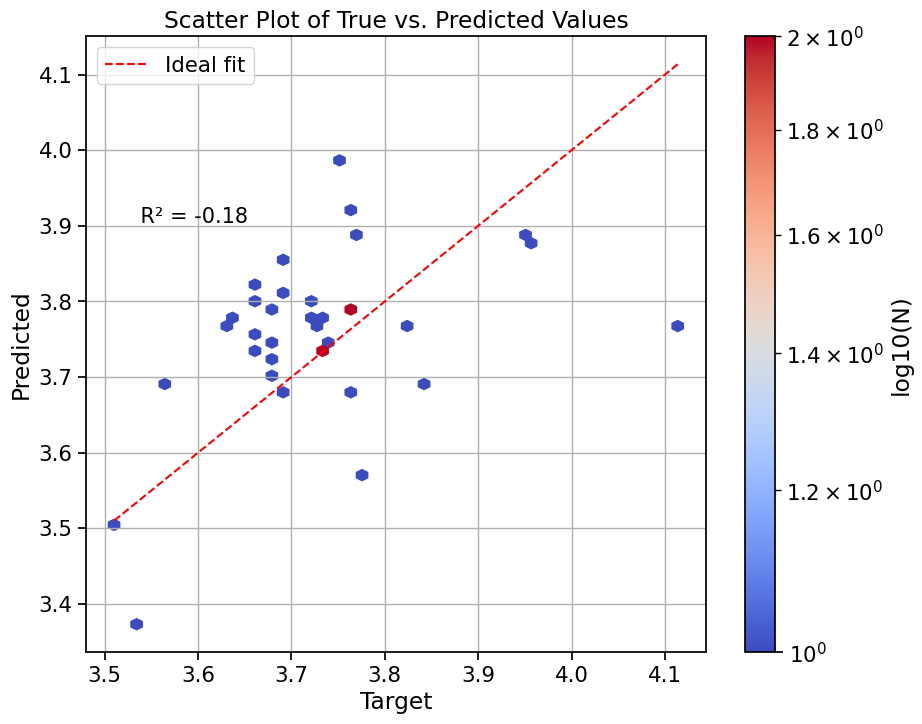

In [422]:
test_plot(df_selected['medianBrightness'],df_selected['fitness'])

In [417]:
selected_sequences = df_selected_pred['full_seq'].values
blosum_encoded = sequence_to_blosum(selected_sequences,amino_acid_index, amino_acid_vectors)

X_top = blosum_encoded

y_top_pred = model.predict(X_top)
y_top_pred

df_selected_pred['fitness'] = y_top_pred.ravel()
df_selected_pred

392/392 [==============================] - 1s 3ms/step


Unnamed: 0                  aaMutations  \
0               0                        E110A   
1               1                        E110D   
2               2                        E110G   
3               3                        E110K   
4               4                        E110Q   
...           ...                          ...   
12538       12538  E110V:T61S:K157V:N163Y:F98I   
12539       12539  E110V:T61S:K157V:N163Y:F98L   
12540       12540  E110V:T61S:K157V:N163Y:F98S   
12541       12541  E110V:T61S:K157V:N163Y:F98V   
12542       12542  E110V:T61S:K157V:N163Y:F98Y   

                                                full_seq   fitness  
0      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.768810  
1      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.574911  
2      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.373237  
3      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.676124  
4      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  3.693428  
...                                                  ...       ...  
12538  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  4.024421  
12539  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  4.053564  
12540  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  4.023773  
12541  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  4.067822  
12542  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...  4.104595  

[12543 rows x 4 columns]

In [419]:
merged = pd.merge( df_selected_pred,df_selected, on ='full_seq', how='left')
merged['Fitness'] = merged['fitness_x']
merged

Unnamed: 0                aaMutations_x  \
0               0                        E110A   
1               1                        E110D   
2               2                        E110G   
3               3                        E110K   
4               4                        E110Q   
...           ...                          ...   
12538       12538  E110V:T61S:K157V:N163Y:F98I   
12539       12539  E110V:T61S:K157V:N163Y:F98L   
12540       12540  E110V:T61S:K157V:N163Y:F98S   
12541       12541  E110V:T61S:K157V:N163Y:F98V   
12542       12542  E110V:T61S:K157V:N163Y:F98Y   

                                                full_seq  fitness_x  \
0      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.768810   
1      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.574911   
2      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.373237   
3      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.676124   
4      MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.693428   
...                                                  ...        ...   
12538  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   4.024421   
12539  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   4.053564   
12540  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   4.023773   
12541  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   4.067822   
12542  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   4.104595   

      aaMutations_y  medianBrightness  fitness_y   Fitness  
0             E110A          3.633695   3.768810  3.768810  
1               NaN               NaN        NaN  3.574911  
2             E110G          3.539372   3.373237  3.373237  
3             E110K          3.689720   3.676124  3.676124  
4             E110Q          3.836577   3.693428  3.693428  
...             ...               ...        ...       ...  
12538           NaN               NaN        NaN  4.024421  
12539           NaN               NaN        NaN  4.053564  
12540           NaN               NaN        NaN  4.023773  
12541           NaN               NaN        NaN  4.067822  
12542           NaN               NaN        NaN  4.104595  

[12543 rows x 8 columns]

In [433]:
merged.to_csv('predictionsCovar_blosumH5.csv')

In [432]:
import plotly
from plotly.subplots import make_subplots

merged['category'] = merged['aaMutations_x'].apply(lambda x: x.count(':'))

# Determine the number of categories (plus one for any counts above 4)
max_category = int(merged['category'].max())

# Setup subplots
fig = make_subplots(rows=1, cols=max_category+1, shared_yaxes=True, subplot_titles=[f"{i+1} Mutation(s)" for i in range(max_category+1)])
category_colors = plotly.colors.qualitative.Plotly # Add more colors if needed
# Add jitter and plot data for each category
for i in range(max_category+1):
    # Filter data for each category
    df_filtered = merged[merged['category'] == i]
    jitter = np.random.uniform(-0.2, 0.2, size=len(df_filtered)) + i  # Jitter and shift to align vertically on subplots
    color = ['black' if not np.isnan(val) else category_colors[i % len(category_colors)] for val in df_filtered['medianBrightness']]

    fig.add_trace(
        go.Scatter(
            x=jitter,
            y=df_filtered['Fitness'],
            mode='markers',
            name=f" {i+1} Mutation(s)",
            marker=dict(size=6, color=color),
            # marker=dict(size=6),
            text=df_filtered['aaMutations_x'],  # Hover text
            hoverinfo='text+y'
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title='Brightness predicted of variants grouped by number of mutations',
    yaxis_title='Predicted Brightness',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=800,
    width=1200 * (max_category + 1) / 5,  # Adjust width based on the number of subplots
    plot_bgcolor='white',
    showlegend=False,
       font=dict(
        size=16,  # Specify a default font size
    )
)
fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False)

# Show the plot
fig.show()